In [1]:
!pip install lime
!pip install tf-explain

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


c:\ProgramData\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1000ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 

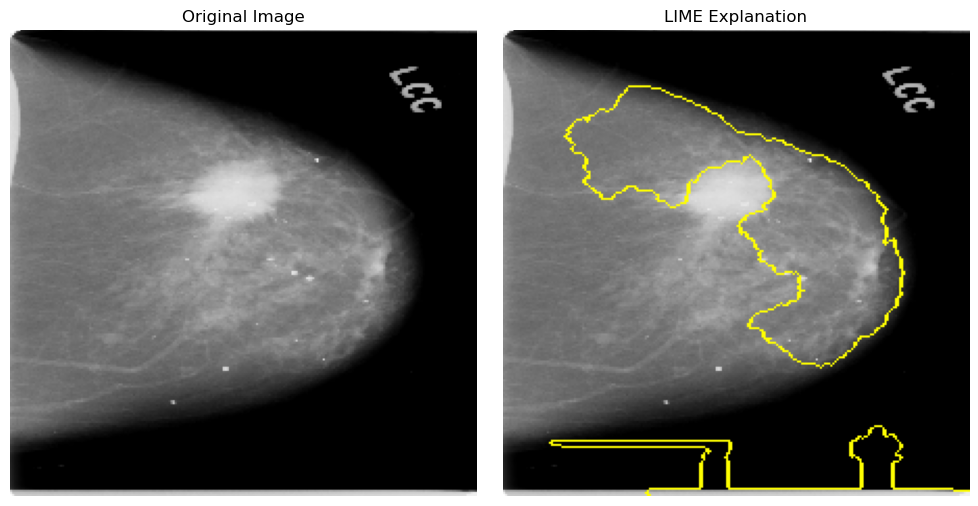

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
Model Prediction: Benign (Probability: 0.0437)


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Load the trained VGG16 model
model = load_model('Resnet50_v2.keras')

# Function to preprocess image for VGG16
def preprocess_image(image_path):
    # Load image and resize to 224x224 (VGG16 input size)
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    # Normalize pixel values to [0, 1]
    img = img / 255.0
    # Expand dimensions to match model input shape (1, 224, 224, 3)
    img = np.expand_dims(img, axis=0)
    return img

# Function to predict with the model (for LIME)
def predict_fn(images):
    # Images come from LIME as a batch of perturbed images
    # Ensure images are in the correct format for VGG16
    images = np.array([img / 255.0 if img.max() > 1 else img for img in images])
    # Get model predictions
    preds = model.predict(images)
    return preds

# Load and preprocess a sample image
image_path = r'C:\Users\Anne\OneDrive - National University of Ireland, Galway\Documents\Data Analytics\PROJECT\custom\Abnormal\set3\1.3.6.1.4.1.9590.100.1.2.253992292511749643718075355262495714002_1-1.png'  # Replace with your image path
original_image = load_img(image_path, target_size=(224, 224))
original_image_array = img_to_array(original_image) / 255.0
preprocessed_image = preprocess_image(image_path)

# Initialize LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Generate explanation
# num_samples: number of perturbed images to generate
# top_labels: number of top predictions to explain (1 for binary classification)
explanation = explainer.explain_instance(
    original_image_array,
    predict_fn,
    top_labels=1,
    hide_color=0,  # Replace superpixels with black during perturbation
    num_samples=1000  # Number of perturbations (adjust for speed vs. accuracy)
)

# Get the explanation for the top predicted class
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,  # Show only positive contributions
    num_features=5,  # Number of superpixels to highlight
    hide_rest=False  # Show the entire image with highlighted regions
)

# Plot the original image and LIME explanation
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image_array)
plt.axis('off')

# LIME explanation with superpixel boundaries
plt.subplot(1, 2, 2)
plt.title('LIME Explanation')
plt.imshow(mark_boundaries(temp, mask))
plt.axis('off')

plt.tight_layout()
plt.savefig('lime_explanation.png')  # Save the plot
plt.show()

# Print model prediction
prediction = model.predict(preprocessed_image)[0][0]
class_label = 'Malignant' if prediction >= 0.5 else 'Benign'
print(f'Model Prediction: {class_label} (Probability: {prediction:.4f})')

In [6]:
!pip install Shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   -------------------------------------- - 524.3/545.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 545.3/545.3 kB 2.3 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


  0%|          | 0/98 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


  0%|          | 0/98 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


PartitionExplainer explainer: 3it [00:21, 10.97s/it]               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..213.0].


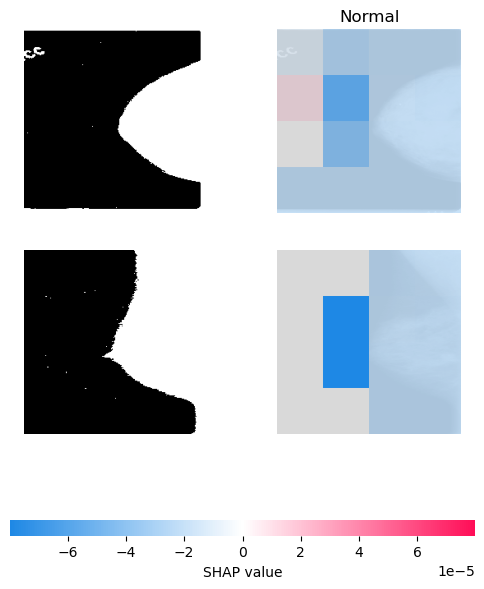

In [5]:
import shap
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D
import os

# ========== CONFIG ==========
model_path = "vgg16_finetuned11_final.keras"
img_path =  r'C:\Users\Anne\OneDrive - National University of Ireland, Galway\Documents\Data Analytics\PROJECT\DDSM_binary\Dataset_large\Test_set\Abnormal\1.3.6.1.4.1.9590.100.1.2.210796469212726064906048175661188744072_1-1.png'  # Replace with your image path
data_dir = r"C:\Users\Anne\OneDrive - National University of Ireland, Galway\Documents\Data Analytics\PROJECT\DDSM_binary\Dataset_large\Training_set\Abnormal" 


class_names = ["Normal", "Abnormal"]
img_size = 224

# ===== LOAD MODEL =====
model = load_model(model_path)

# ===== LOAD MULTIPLE IMAGES =====
def load_images_from_folder(folder, max_images=5):
    images = []
    for fname in os.listdir(folder):
        if fname.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder, fname)
            img = image.load_img(img_path, target_size=(img_size, img_size))
            img_array = image.img_to_array(img)
            images.append(img_array)
            if len(images) >= max_images:
                break
    return np.array(images)

# Load a few images for SHAP explanation
X = load_images_from_folder(data_dir, max_images=5)
X_preprocessed = preprocess_input(X.copy())  # We'll use this inside f(x)

# ===== DEFINE PREDICT FUNCTION =====
def f(x):
    x_copy = x.copy()
    x_preprocessed = preprocess_input(x_copy)
    return model.predict(x_preprocessed)

# ===== DEFINE MASKER =====
masker = shap.maskers.Image("blur(64,64)", X[0].shape)

# ===== CREATE EXPLAINER =====
explainer = shap.Explainer(f, masker, output_names=class_names)

# ===== EXPLAIN IMAGES =====
shap_values = explainer(
    X[1:3], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:2]
)

# ===== PLOT RESULTS =====
shap.image_plot(shap_values)

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("awsaf49/cbis-ddsm-breast-cancer-image-dataset")

# print("Path to dataset files:", path)

  8%|▊         | 426M/4.95G [16:08<2:56:00, 461kB/s]  


KeyboardInterrupt: 

In [2]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("paultimothymooney/breast-histopathology-images")

# print("Path to dataset files:", path)

  7%|▋         | 224M/3.10G [33:33<7:21:51, 117kB/s]   


ConnectionError: HTTPSConnectionPool(host='storage.googleapis.com', port=443): Read timed out.

In [ ]:
# Set paths
base_dir = 'Dataset_preprocessed'
train_dir = os.path.join(base_dir, 'Training_set')
test_dir = os.path.join(base_dir, 'Test_set')
classes = ['Abnormal', 'Normal']

# Image parameters
IMG_SIZE = 224
BATCH_SIZE = 32

# 1. Class Distribution
def get_class_distribution(directory, set_name):
    counts = {}
    for cls in classes:
        cls_dir = os.path.join(directory, cls)
        counts[cls] = len([f for f in os.listdir(cls_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
    return pd.DataFrame(counts, index=[set_name])

# Get distributions
train_dist = get_class_distribution(train_dir, 'Training')
test_dist = get_class_distribution(test_dir, 'Test')
dist_df = pd.concat([train_dist, test_dist])
print("Class Distribution:")
print(dist_df)

# Plot class distribution
plt.figure(figsize=(8, 5))
dist_df.plot(kind='bar', stacked=False)
plt.title('Class Distribution in Training and Test Sets')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

# 4. Sample Images
def display_sample_images(directory, num_samples=4):
    plt.figure(figsize=(12, 4))
    for i, cls in enumerate(classes):
        cls_dir = os.path.join(directory, cls)
        img_files = [f for f in os.listdir(cls_dir)][:num_samples]
        for j, img_file in enumerate(img_files):
            img = cv2.imread(os.path.join(cls_dir, img_file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(2, num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.title(f'{cls}')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(train_dir)

def display_sample_images(directory, num_samples=4):
    plt.figure(figsize=(num_samples * 3, len(classes) * 3))
    
    for i, cls in enumerate(classes):
        cls_dir = os.path.join(directory, cls)
        img_files = [f for f in os.listdir(cls_dir) if f.lower().endswith(('.png'))]
        selected_files = random.sample(img_files, min(num_samples, len(img_files)))  # random sampling
        
        for j, img_file in enumerate(selected_files):
            img_path = os.path.join(cls_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax = plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img/ 255.)
            plt.title(f'{cls}')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call function
display_sample_images(train_dir)

# Data Augmentation and Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(224, 224),
    shuffle=True
)

def plot_random_images_from_generator(generator, class_names=None, num_images=8):
    images, labels = next(generator)
    indices = random.sample(range(len(images)), min(num_images, len(images)))
    
    rows, cols = 2, 4
    plt.figure(figsize=(cols * 3, rows * 3))

    for i, idx in enumerate(indices):
        plt.subplot(rows, cols, i + 1)

        # Convert to uint8 for better visualization
        img = (images[idx] * 255).astype(np.uint8)
        plt.imshow(img)

        # Convert label to class name
        if class_names is not None:
            if labels.ndim > 1:
                label_index = np.argmax(labels[idx])
            else:
                label_index = int(labels[idx])
            title = class_names[label_index]
        else:
            title = f"Class {labels[idx]}"
        
        plt.title(title)
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

# Display sample augmented images
plot_random_images_from_generator(train_generator, class_names=classes, num_images=8)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tf_explain.core.grad_cam import GradCAM
import os



# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    
    horizontal_flip=True,
    # preprocessing_function=tf.keras.applications.resnet50.preprocess_input
    # preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

def plot_random_images_from_generator(generator, class_names=None, num_images=8):
    # Fetch one batch
    images, labels = next(generator)
    indices = random.sample(range(len(images)), min(num_images, len(images)))
    
    rows = 2
    cols = 4
    plt.figure(figsize=(cols * 3, rows * 3))
    
    for i, idx in enumerate(indices):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[idx])
        
        # Decode label
        if class_names is not None:
            if labels.ndim > 1:
                label_index = np.argmax(labels[idx])
            else:
                label_index = int(labels[idx])
            title = class_names[label_index]
        else:
            title = f"Class {labels[idx]}"
        
        plt.title(title)
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

# Usage example:
plot_random_images_from_generator(train_generator, class_names=classes, num_images=8)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread(r'C:\Users\Anne\OneDrive - National University of Ireland, Galway\Documents\Data Analytics\PROJECT\Capstone2025_Anne\Dataset\Training_set\Abnormal\Abnormal (2).png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not loaded. Check the file path.")

# Blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Threshold to separate breast from background
_, thresh = cv2.threshold(blurred, 15, 255, cv2.THRESH_BINARY)

# Find contours and keep the largest one (the breast)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

# Create mask from the largest contour
mask = np.zeros_like(img)
cv2.drawContours(mask, [largest_contour], -1, color=255, thickness=-1)

# Optional: Close small holes in the mask
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Extract the breast region
breast_only = cv2.bitwise_and(img, img, mask=mask)

# ▶️ Find minimum grayscale value in the breast region (excluding 0s)
non_zero_pixels = breast_only[mask > 0]
min_val = int(np.min(non_zero_pixels)) if len(non_zero_pixels) > 0 else 0

# Fill background (mask == 0) with this minimum value
cleaned = breast_only.copy()
cleaned[mask == 0] = min_val

# Show results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Background Matched to Darkest Breast Pixel")
plt.imshow(cleaned/255., cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# import os
# import cv2
# import numpy as np
# from tqdm import tqdm

# # Set your input and output directories
# train_dir = r'C:\Users\Anne\OneDrive - National University of Ireland, Galway\Documents\Data Analytics\PROJECT\Capstone2025_Anne\Dataset\Test_set'
# output_dir = r'C:\Users\Anne\OneDrive - National University of Ireland, Galway\Documents\Data Analytics\PROJECT\Capstone2025_Anne\Dataset_preprocessed\Test_set'

# # Make sure output directory exists
# os.makedirs(output_dir, exist_ok=True)

# # Loop through each class folder (e.g., 'Normal', 'Abnormal')
# for class_name in os.listdir(train_dir):
#     class_path = os.path.join(train_dir, class_name)
#     if not os.path.isdir(class_path):
#         continue

#     # Create corresponding folder in output directory
#     output_class_path = os.path.join(output_dir, class_name)
#     os.makedirs(output_class_path, exist_ok=True)

#     # Process each image in the class folder
#     for filename in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):
#         input_path = os.path.join(class_path, filename)
#         output_path = os.path.join(output_class_path, filename)

#         # Read image in grayscale
#         img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
#         if img is None:
#             print(f"Warning: Couldn't read image {input_path}")
#             continue

#         try:
#             # Apply Gaussian blur
#             blurred = cv2.GaussianBlur(img, (5, 5), 0)

#             # Threshold to separate foreground
#             _, thresh = cv2.threshold(blurred, 15, 255, cv2.THRESH_BINARY)

#             # Find contours and keep the largest
#             contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#             if not contours:
#                 print(f"No contours found in {input_path}")
#                 continue
#             largest_contour = max(contours, key=cv2.contourArea)

#             # Create mask from largest contour
#             mask = np.zeros_like(img)
#             cv2.drawContours(mask, [largest_contour], -1, color=255, thickness=-1)

#             # Clean mask with morphological closing
#             kernel = np.ones((5, 5), np.uint8)
#             mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

#             # Apply mask to get breast region
#             breast_only = cv2.bitwise_and(img, img, mask=mask)

#             # Fill background with minimum pixel in breast area
#             non_zero_pixels = breast_only[mask > 0]
#             min_val = int(np.min(non_zero_pixels)) if len(non_zero_pixels) > 0 else 0
#             cleaned = breast_only.copy()
#             cleaned[mask == 0] = min_val

#             # Save cleaned image
#             cv2.imwrite(output_path, cleaned)

#         except Exception as e:
#             print(f"Error processing {input_path}: {e}")


In [ ]:
# from PIL import Image
# import os

# input_folder = r'C:\Users\Anne\OneDrive - National University of Ireland, Galway\Documents\Data Analytics\PROJECT\Capstone2025_Anne\Dataset\Training_set\Abnormal'
# output_folder = r'C:\Users\Anne\OneDrive - National University of Ireland, Galway\Documents\Data Analytics\PROJECT\Capstone2025_Anne\Dataset\Training_set\Abnormal'

# os.makedirs(output_folder, exist_ok=True)

# for filename in os.listdir(input_folder):
#     if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
#         img_path = os.path.join(input_folder, filename)
#         img = Image.open(img_path)
#         resized_img = img.resize((224, 224))
        
#         save_path = os.path.join(output_folder, filename)
#         resized_img.save(save_path)

# print("All images resized.")
